#**Oasis Infobyte : Data Science Internship**#

**Task 4 : Email spam detection with machine learning**

**Name of Intern : Vibhav Gupta**

**Batch : April Phase 2 OIBSIP.**

#**Step 1 : Importing libraries**#

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
df.count()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
df.shape

(5572, 5)

In [13]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
df.shape

(5572, 2)

In [20]:
df.duplicated().sum()

403

In [21]:
df=df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.rename(columns={'v1':'Target','v2':'Mail'},inplace=True)
df.head(5)

<ipython-input-23-59204d48c268>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'Target','v2':'Mail'},inplace=True)


,Target,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
from sklearn.preprocessing import LabelEncoder
E=LabelEncoder()

In [25]:
df['Target']=E.fit_transform(df['Target'])

<ipython-input-25-3949f92f022f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target']=E.fit_transform(df['Target'])


In [26]:
df.head()

,Target,Mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Target', ylabel='count'>

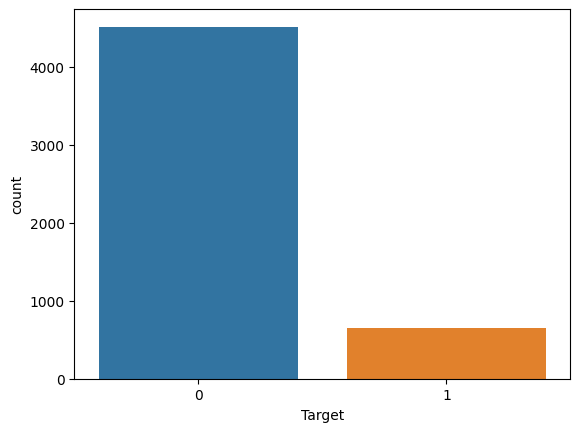

In [27]:
sns.countplot(x=df["Target"])

<ipython-input-28-dbc291e35042>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Target"])


<Axes: ylabel='Density'>

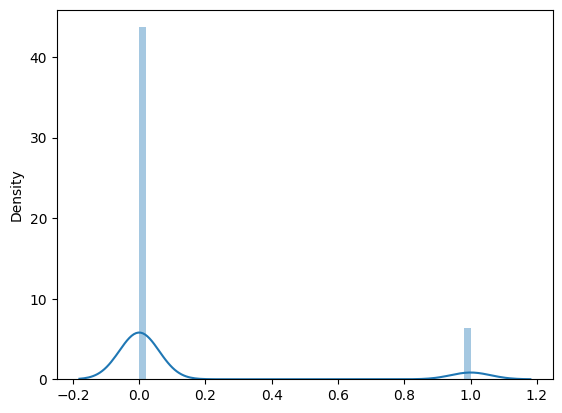

In [28]:
sns.distplot(x=df["Target"])

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
T=TfidfVectorizer(encoding='latin-1',stop_words='english',analyzer='word',lowercase=True,smooth_idf=True)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
x=df['Mail']
y=df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [32]:
f_train=T.fit_transform(x_train)
f_test=T.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(f_train,y_train)

LogisticRegression()

In [34]:
y_pred=LR.predict(f_test)

In [35]:
from sklearn import metrics
print(confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, LR.predict(f_test)))

[[1338    3]
 [  81  129]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1341
           1       0.98      0.61      0.75       210

    accuracy                           0.95      1551
   macro avg       0.96      0.81      0.86      1551
weighted avg       0.95      0.95      0.94      1551



In [36]:
print("Accuracy of model:",accuracy_score(y_test,y_pred))

Accuracy of model: 0.9458413926499033


In [37]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier(random_state=50)
D.fit(f_train,y_train)

DecisionTreeClassifier(random_state=50)

In [38]:
y_pred1=D.predict(f_test)

In [39]:
print(confusion_matrix(y_test,y_pred1))
print(metrics.classification_report(y_test, y_pred1))

[[1325   16]
 [  53  157]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.91      0.75      0.82       210

    accuracy                           0.96      1551
   macro avg       0.93      0.87      0.90      1551
weighted avg       0.95      0.96      0.95      1551



In [40]:
print("Accuracy of model:",accuracy_score(y_test,y_pred1))

Accuracy of model: 0.9555125725338491


#**Thankyou**#